In [37]:
# Import libraries
from urllib2 import urlopen
from json import load 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt

We collected information about the number of page visits for each major candidate in the Democratic and Republican party primaries between January 1, 2013 and April 30, 2016 and we ended up with data from July of 2015 through April of 2016.  We wanted to see how the number of page views fluctuated for each candidtate over the course of their time running for office. To do this we read in data from Wikipedia's metrics for each candidate and created a data frame of the page view information for each candidate's page. Here is how we collected the data.

In [36]:

################
#Buliding URL:#
##############


# Article for which page views need to be extracted.
look_up=[ "Donald_Trump","Bernie_Sanders", "Hillary_Clinton","Ted_Cruz","John_Kasich"]

# Dates between which page views need to be extracted in the format YYYYMMDD
startdate="20130101"
enddate="20160430"
i=0
for name in look_up:
    
# Request URL : https://wikimedia.org/api/rest_v1/?doc
    url='https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/'+name+'/daily/'+startdate+'/'+enddate

    response = urlopen(url) 

# Parses the json response and creates a dictionary with key "list" and value of a list of dictionaries
# where each dictionary is a day's page view data.
    json_obj = load(response) 

# Extacting just the list of dictionaries and creating a data frame
    if i==0:
        data=pd.DataFrame(json_obj['items'])
    else:
        data=pd.concat([data,pd.DataFrame(json_obj['items'])])
    i=i+1

We then looked at the data to assess its characteristics and begin the cleaning process. We collecte the folowing features:
access - tells who had the ability to access the page, all pages we collected were categorized as "all-access"
agent -
article - references the candidate that the article was about, eg. "Donald Trump".
granularity - the granularity of page views tallied, in this case, all were tallied daily.
project - 
timestamp - The timestamp of the pageview, also set to the day viewed.
views - the number of times the page was viewed that day.

We then cleaned up the timestamp to be more legible and created time2 which strips the 2 additional zeros off of the right side of the timestamp and then converted time2 to display as a normal date format for better legibility. The cleaning process and the first few lines of cleaned data can be sean below.

In [29]:
########################
# Data cleaning begins#
######################

# Step 1 : manipulate the timestamp to create a date attribute
data["time2"]=data["timestamp"].str.rstrip('00')
data['time2']=[x + '0' if len(x)<8 else x for x in data['time2']]
data['date']=pd.to_datetime(data["time2"],format="%Y%m%d")

# Print first few rows of data.
data.head()

,access,agent,article,granularity,project,timestamp,views,time2,date
0,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070100,82159,20150701,2015-07-01
1,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070200,83458,20150702,2015-07-02
2,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070300,55615,20150703,2015-07-03
3,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070400,43865,20150704,2015-07-04
4,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070500,42220,20150705,2015-07-05


We then created a new dataframe that just contains the candidate and the number of daily views.

In [30]:
# Create new dataframe of just candidates and page views.
data_views=pd.DataFrame(data['article'])
data_views['views']=data['views']
data_views.head()

,article,views
0,Donald_Trump,82159
1,Donald_Trump,83458
2,Donald_Trump,55615
3,Donald_Trump,43865
4,Donald_Trump,42220


We then counted the number of days that there was data for each candidate, which was 305 days. We calculated descriptive statistics based on this for each candidate to get a better idea of the distribution of the page views for each candidate.

In [65]:
# Create counts of number of days viewed.
PDA_DataViews=data_views.groupby(['article']).count()

# Get descriptive statistics about page views for each candidate
PDA_DataViews['mean']=data_views.groupby(['article']).mean()
PDA_DataViews['std']=data_views.groupby(['article']).std()
PDA_DataViews['median']=data_views.groupby(['article']).median()
PDA_DataViews['min']=data_views.groupby(['article']).min()
PDA_DataViews['max']=data_views.groupby(['article']).max()

# Reset Index
PDA_DataViews= PDA_DataViews.reset_index()

# Print Table
PDA_DataViews

,article,views,mean,std,median,min,max
0,Bernie_Sanders,305,48601.416393,49015.837196,34756,9310,488675
1,Donald_Trump,305,154487.898361,354055.800585,75205,26675,4071156
2,Hillary_Clinton,305,21724.032787,15859.330724,15435,7135,114790
3,John_Kasich,305,13071.632787,25664.930995,4946,1239,274379
4,Ted_Cruz,305,28661.927869,42115.932353,15435,3796,597879


We then wanted to compare page views for each candidate over time using a graph to see if there were any discernable trends, so first we created a new variable consisting of each candidate name.

In [66]:
# Create new variable of each unique candidate name for plotting purposes.
cd=list(data['article'].unique())
print cd

[u'Donald_Trump', u'Bernie_Sanders', u'Hillary_Clinton', u'Ted_Cruz', u'John_Kasich']


In [ ]:
Then we proceded to plot the number of page views over time for each candidate. The resulting graph can be seen below.

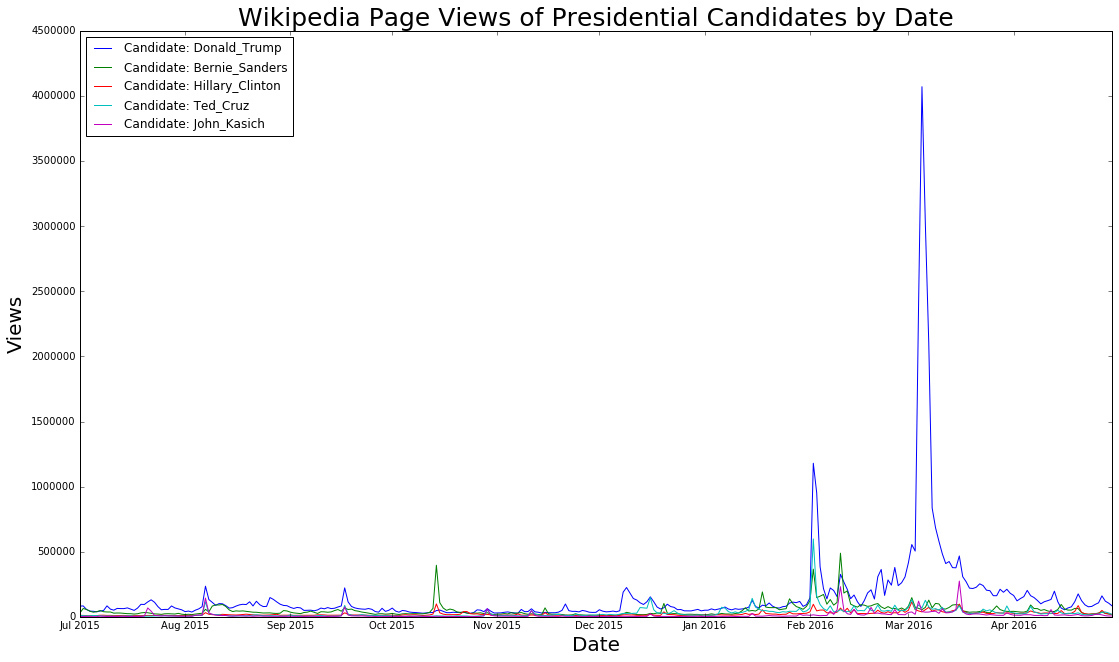

In [19]:
# Plot figure.
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
data.sort_values(by=['article', 'date'], ascending=[True, True])
for x in cd:
    dat = data[data['article']==x]
    dates =  dat['date']
    ax.plot(dates, dat['views'], label = "Candidate: {0}".format(x))

plt.xlabel("Date", fontsize = 20)
plt.ylabel("Views", fontsize = 20)
plt.title("Wikipedia Page Views of Presidential Candidates by Date", fontsize=25)
ax.legend(loc="upper left")
plt.show()